## Phát biểu bài toán
___

- Phân tích thị trường cầu thủ bóng đá, tìm sự liên hệ giữa các thuộc tính, từ đó phân tích cầu thủ thành các nhóm, cụm có ý nghĩa thống kê và tính chất tương đồng nhau
- Input: dữ liệu về cầu thủ bóng đá thu thập được từ trang [Sofascore](https://www.sofascore.com/). Dữ liệu cầu thủ bóng đá chứa các biến sau: 
    * name : String, Tên cầu thủ
    * nationality: String, Quốc tịch cầu thủ
    * market_value: Integer, Giá trị cầu thủ (đơn vị là nghìn Euro)
    * age: Integer, Tuổi cầu thủ
    * height: Integer, Chiều cao của cầu thủ (đơn vị cm)
    * preferred_foot: String, Chân đá yêu thích của cầu thủ
    * position: String, Vị trí đá của cầu thủ (F: Forward, M: Midfielder, D: Defender, G: Goalkeeper)
    * attacking: Integer, Chỉ số tấn công của cầu thủ
    * technical: Integer, Chỉ số kỹ thuật của cầu thủ
    * tactical: Integer, Chỉ số chiến thuật của cầu thủ
    * defending: Integer, Chỉ số phòng thủ của cầu thủ
    * creativity: Integer, Chỉ số sáng tạo của cầu thủ
    * saves: Integer, Chỉ số cản phá bóng của cầu thủ (chỉ cho thủ môn) 
    * anticipation: Integer, Chỉ số dự đoán bóng của cầu thủ (chỉ cho thủ môn) 
    * ball_distribution: Integer, Chỉ số đóng góp bóng của cầu thủ (chỉ cho thủ môn) 
    * aerial: Integer, Chỉ số tranh chấp trên không bóng của cầu thủ (chỉ cho thủ môn) 
    * avg_score_last_12_months: Float, Điểm số trung bình được đánh giá trong 12 tháng qua
    * appearances_last_12_months: Integer, Số trận đã thi đấu trong 12 tháng qua
    * club: String, Tên câu lạc bộ đang thi đấu hiện tại
    * league: String, Giải đấu chính của câu lạc bộ
    * country: String, Nước tổ chức câu lạc bộ (always 1)

    Ở bảng dữ liệu của các quốc gia sẽ chứa các biến sau:
    * rank : Integer, Xếp hạng sức mạnh quốc gia theo FIFA
    * name : String, Tên quốc gia
    * name_code: String, Tên viết tắt của quốc gia
    * points: Float, Hệ số sức mạnh quả quốc gia
    * tournament_name: String, Tên giải đấu lớn nhất của quốc gia

    Ở bảng dữ liệu của các câu lạc bộ sẽ chứa các biến sau:
    * name : String, Tên quốc gia
    * position: Integer, Thứ hạng của câu lạc bộ trong giải đấu
    * tournament: String, Tên giải đấu chính đang tham gia
    * country: String, Tên quốc gia tổ chức giải đấu
- Output: kết quả đạt được là những cụm cầu thủ bóng đá theo các tiêu chí đánh giá

## Data and Setup

____
### ** Import library **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ** Đọc các file **

In [2]:
players = pd.read_csv('../clean_data/players.csv')
countries = pd.read_csv('../clean_data/countries.csv')
clubs = pd.read_csv('../clean_data/clubs.csv')

players = players.merge(countries[['name', 'points']], how='left', left_on='country', right_on='name')
players = players.rename(columns={'points': 'point_of_tournament', 'name_x': 'name'})
players = players.drop('name_y', axis=1)

### ** Check the info() of the players **

In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11814 entries, 0 to 11813
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        11814 non-null  object 
 1   market_value                11814 non-null  int64  
 2   club                        11814 non-null  object 
 3   country                     11814 non-null  object 
 4   league                      11814 non-null  object 
 5   nationality                 11814 non-null  object 
 6   age                         11814 non-null  int64  
 7   height                      11814 non-null  int64  
 8   preferred_foot              11814 non-null  object 
 9   position                    11814 non-null  object 
 10  shirt_number                11814 non-null  int64  
 11  attacking                   11814 non-null  int64  
 12  technical                   11814 non-null  int64  
 13  tactical                    118

### ** Check the head of players **

In [5]:
players.head(3)

,name,market_value,club,country,league,nationality,age,height,preferred_foot,position,...,tactical,defending,creativity,saves,anticipation,ball_distribution,aerial,avg_score_last_12_months,appearances_last_12_months,point_of_tournament
0,Luciano Gondou,7400,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,189,Left,F,...,51,33,49,0,0,0,0,7.14,33,1858.0
1,Maximiliano Romero,2500,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,25,179,Right,F,...,54,32,47,0,0,0,0,6.86,37,1858.0
2,Gastón Verón,1200,Argentinos Juniors,Argentina,Liga Profesional de Fútbol,ARG,22,184,Right,F,...,45,29,48,0,0,0,0,6.80,34,1858.0


### ** Lưu dữ liệu vào các biến **

In [6]:
players_market_value = players['market_value']
players_not_G = players[players['position'] != 'G']
players_F = players[players['position'] == 'F']
players_M = players[players['position'] == 'M']
players_D = players[players['position'] == 'D']
players_G = players[players['position'] == 'G']

## Giới thiệu về bộ dữ liệu
___

### ** Tỉ lệ số lượng cầu thủ theo vị trí, chân thuận **

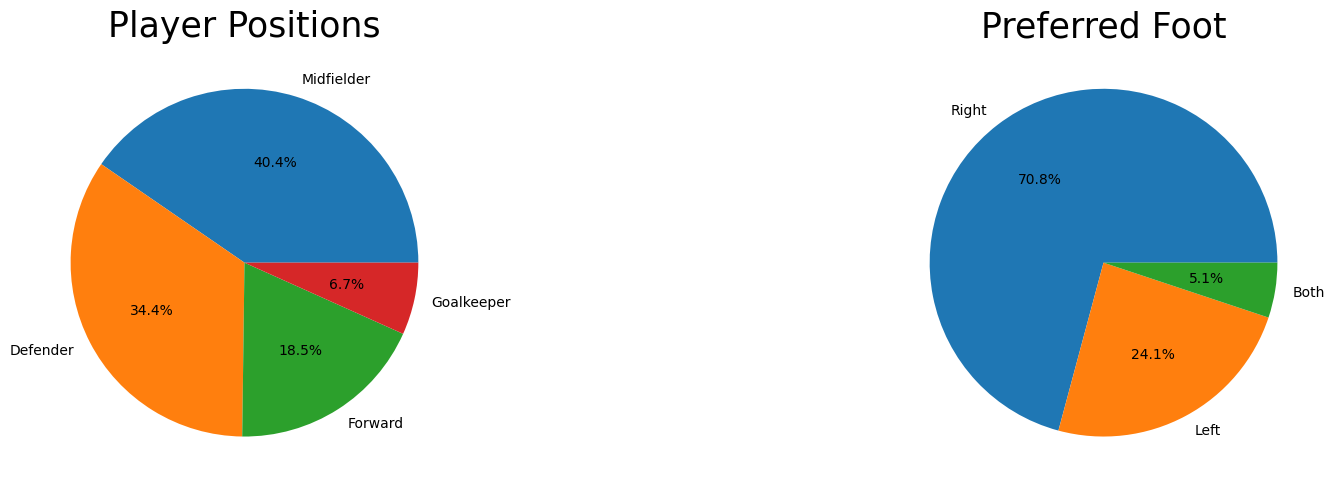

In [7]:
position_labels = []
for position in players['position'].value_counts().index:
    if position == 'G':
        position_labels.append('Goalkeeper')
    elif position == 'D':
        position_labels.append('Defender')
    elif position == 'M':
        position_labels.append('Midfielder')
    elif position == 'F':
        position_labels.append('Forward')
        
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(players['position'].value_counts(), labels=position_labels, autopct='%1.1f%%')
plt.title('Player Positions',fontsize=25) 

plt.subplot(1, 2, 2)
plt.pie(players['preferred_foot'].value_counts().values, labels= players['preferred_foot'].value_counts().index, autopct='%1.1f%%')
plt.title('Preferred Foot',fontsize=25) 

plt.tight_layout() 


### ** Số lượng quốc gia, giải đấu **

In [8]:
print("Số lượng quốc gia:", len(players['country'].unique()))
print("Số lượng giải đấu:", len(players['league'].unique())) 

Số lượng quốc gia: 94
Số lượng giải đấu: 79


## Trực quan hóa dữ liệu đơn biến
___

### ** Trực quan hóa chiều cao cầu thủ

             Value
Median  180.000000
Mean    180.671322
Std       6.927658
Max     206.000000
Min     156.000000


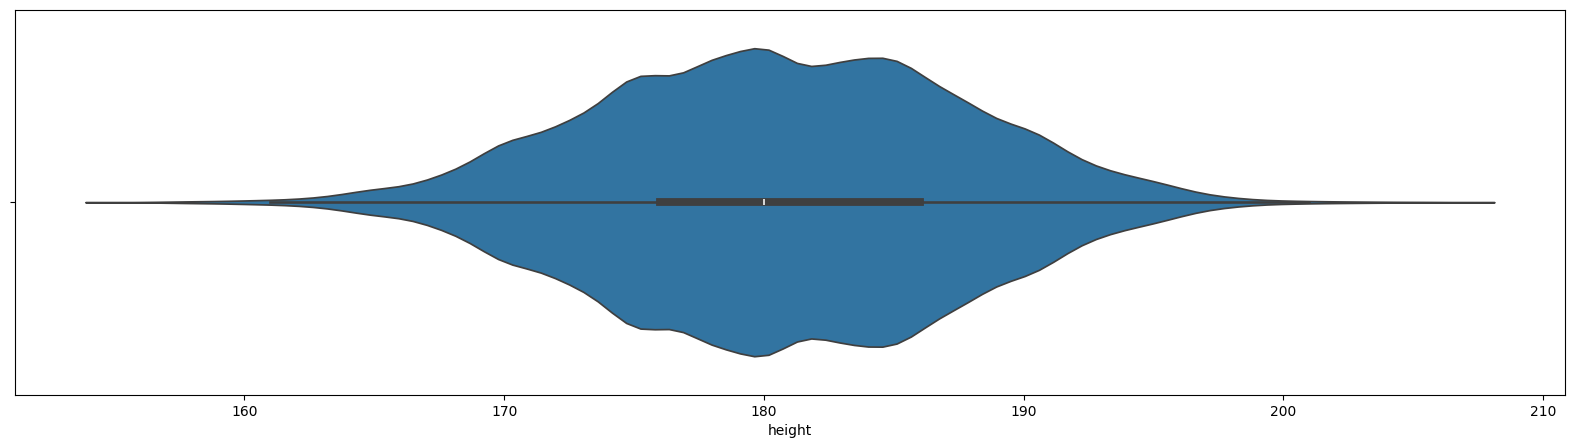

In [9]:
height_data = players['height'] 

plt.figure(figsize=(20, 5))
sns.violinplot(x = height_data) 
print(pd.DataFrame([np.median(height_data.astype(int)),
                np.mean(height_data.astype(int)),
                np.std(height_data.astype(int)),
                np.max(height_data.astype(int)),
                np.min(height_data.astype(int))],index=['Median', 'Mean', 'Std','Max', 'Min'],columns=['Value']))

### ** Trực quan hóa tuổi cầu thủ

            Value
Median  27.000000
Mean    27.367784
Std      4.327805
Max     43.000000
Min     16.000000


<Axes: xlabel='age'>

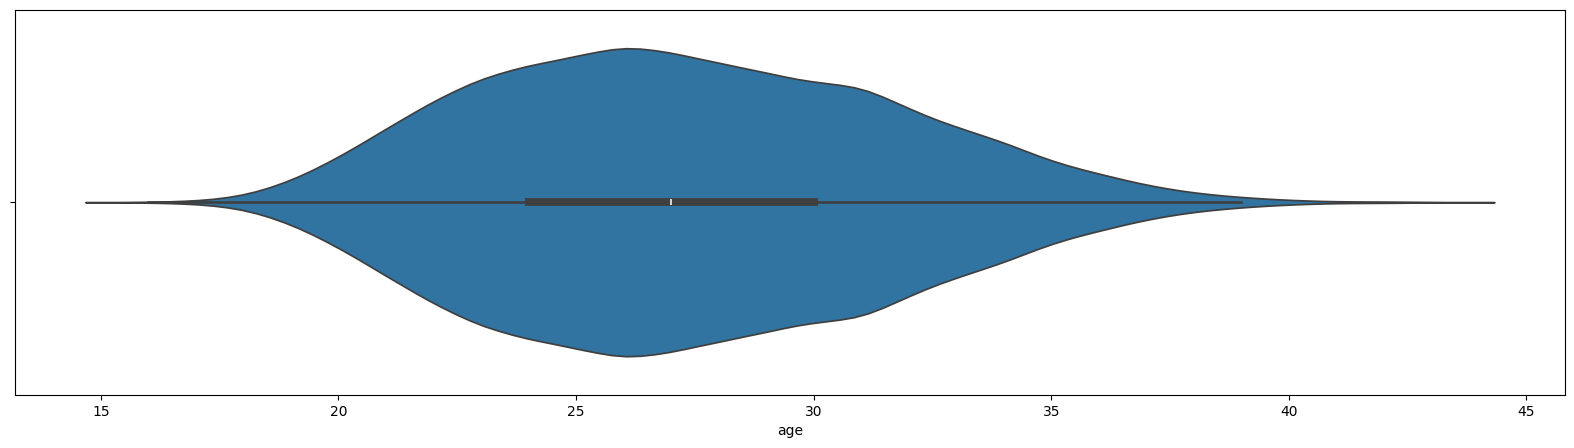

In [10]:
age_data = players['age'] 
print(pd.DataFrame([np.median(age_data),
                np.mean(age_data),
                np.std(age_data),
                np.max(age_data),
                np.min(age_data)],index=['Median', 'Mean', 'Std', 'Max', 'Min'],columns=['Value']))
plt.figure(figsize=(20, 5))
sns.violinplot(x = age_data)  

### ** Trực quan hóa điểm cầu thủ (trong 12 tháng gần nhất)

           Value
Median  6.900000
Mean    6.925908
Std     0.217012
Max     8.690000
Min     6.250000


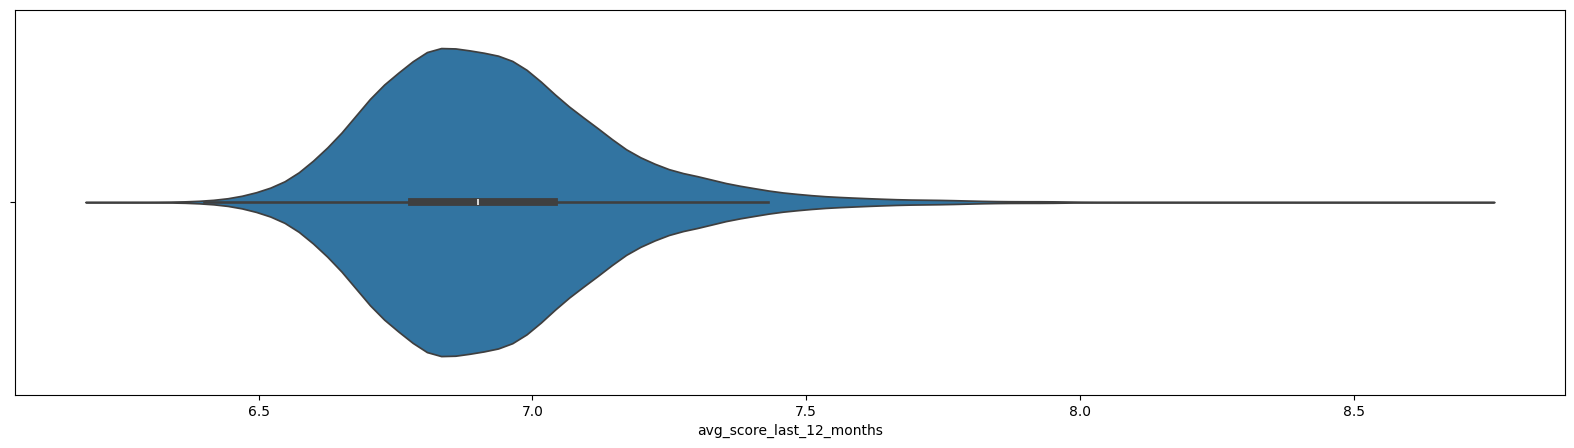

In [11]:
plt.figure(figsize=(20, 5))
sns.violinplot(x = players['avg_score_last_12_months']) 
print(pd.DataFrame([np.median(players['avg_score_last_12_months']),
                np.mean(players['avg_score_last_12_months']),
                np.std(players['avg_score_last_12_months']),
                np.max(players['avg_score_last_12_months']),
                np.min(players['avg_score_last_12_months'])],index=['Median','Mean','Std', 'Max', 'Min'],columns=['Value']))

### ** Trực quan hóa số lần xuất hiện của cầu thủ (trong 12 tháng gần nhất)

                          Value
Median                26.000000
Mean                  27.452853
Std                    8.955910
Max                   66.000000
Min                   10.000000
Q1 (25th Percentile)  21.000000
Q2 (50th Percentile)  26.000000
Q3 (75 Percentile)    32.000000
Q4 (95 Percentile)    44.350000


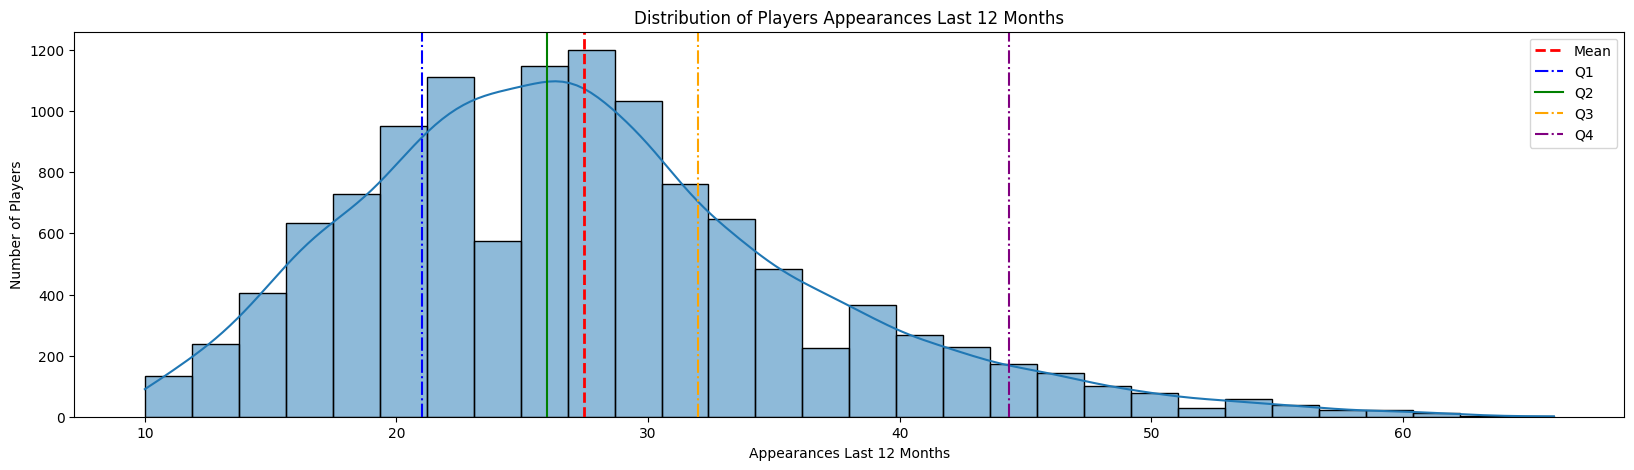

In [12]:
appearances_last_12_months = players['appearances_last_12_months']
print(pd.DataFrame([np.median(appearances_last_12_months),
                np.mean(appearances_last_12_months),
                np.std(appearances_last_12_months),
                np.max(appearances_last_12_months),
                np.min(appearances_last_12_months),
                np.percentile(appearances_last_12_months, 25),
                np.percentile(appearances_last_12_months, 50),
                np.percentile(appearances_last_12_months, 75),
                np.percentile(appearances_last_12_months, 95)
                ],
                index=['Median', 'Mean','Std', 'Max', 'Min', 'Q1 (25th Percentile)', 'Q2 (50th Percentile)', 'Q3 (75 Percentile)', 'Q4 (95 Percentile)'],columns=['Value']))

plt.figure(figsize=(20, 5))
sns.histplot(x = appearances_last_12_months, bins=30, kde=True)
plt.title('Distribution of Players Appearances Last 12 Months')
plt.xlabel('Appearances Last 12 Months')
plt.ylabel('Number of Players')

plt.axvline(np.mean(appearances_last_12_months), color='red', linestyle='--', linewidth=2,label='Mean')
plt.axvline(np.percentile(appearances_last_12_months, 25), color='blue', linestyle='-.',label='Q1')
plt.axvline(np.percentile(appearances_last_12_months, 50), color='green', linestyle='-',label='Q2')
plt.axvline(np.percentile(appearances_last_12_months, 75), color='orange', linestyle='-.',label='Q3')
plt.axvline(np.percentile(appearances_last_12_months, 95), color='purple', linestyle='-.',label='Q4')
plt.legend()
plt.show()

```Nhận xét```
- Biểu đồ thu được có tần suất của dữ liệu phân phố không đồng đều
- Hầu hết các cầu thủ có số lần ra sân trong khoảng 21 đến 32 lần trong 12 tháng gần nhất

### ** Trực quan hóa các thông số cầu thủ **

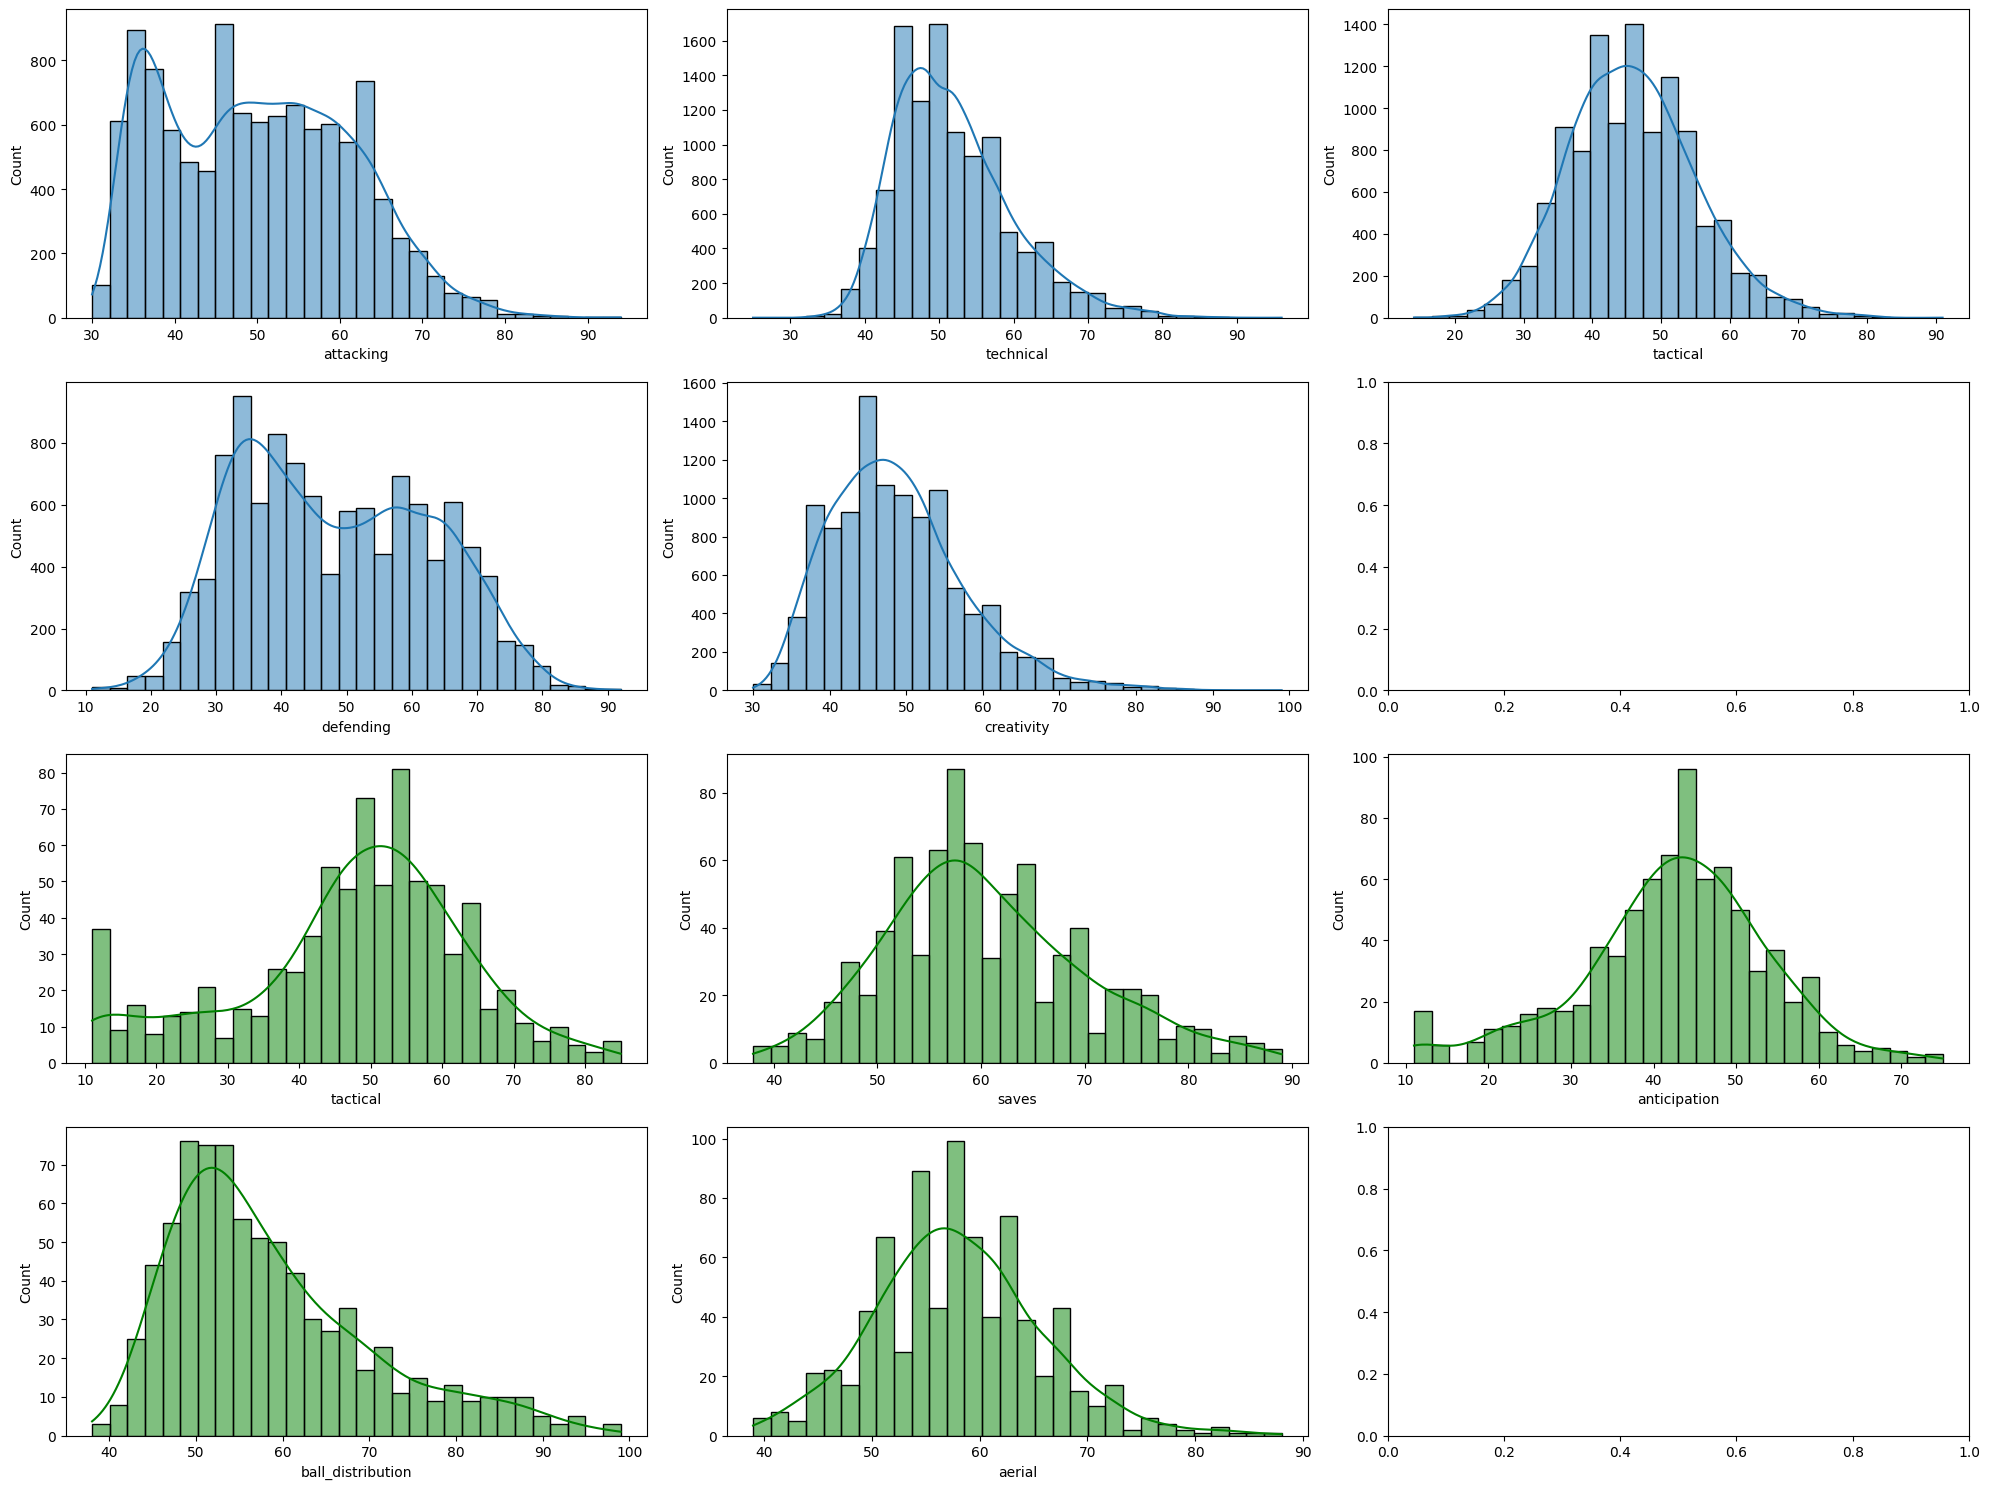

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(20,15)) 

sns.histplot(x = players_not_G['attacking'], bins=30, kde=True, ax=axes[0, 0]) 
sns.histplot(x = players_not_G['technical'], bins=30, kde=True, ax=axes[0, 1]) 
sns.histplot(x = players_not_G['tactical'], bins=30, kde=True, ax=axes[0, 2]) 
sns.histplot(x = players_not_G['defending'], bins=30, kde=True, ax=axes[1, 0]) 
sns.histplot(x = players_not_G['creativity'], bins=30, kde=True, ax=axes[1, 1]) 
sns.histplot(color='g' ,x = players_G['tactical'], bins=30, kde=True, ax=axes[2, 0]) 
sns.histplot(color='g' ,x = players_G['saves'], bins=30, kde=True, ax=axes[2, 1]) 
sns.histplot(color='g' ,x = players_G['anticipation'], bins=30, kde=True, ax=axes[2, 2]) 
sns.histplot(color='g' ,x = players_G['ball_distribution'], bins=30, kde=True, ax=axes[3, 0]) 
sns.histplot(color='g' ,x = players_G['aerial'], bins=30, kde=True, ax=axes[3, 1]) 

plt.tight_layout()


```Nhận xét```
- Đối với các chỉ số thủ môn:
    1. Biểu đồ tactical: phân phối dữ liệu không đều, dữ liệu tập trung đều chủ yếu ở 2 khoản: từ chỉ số 42 đến 62 và từ chỉ số 10 đến 40
    2. Biểu đồ saves: đỉnh của phân phối tập trung ở khoảng giá trị từ 55 đến 60
    3. Biểu đồ anticipation: đỉnh của phân phối tập trung ở khoảng giá trị từ 40 đến 50 
    4. Biểu đồ ball_distrubution: dữ liệu đang bị lệch trái
- Đối với các chỉ số của cầu thủ (trừ thủ môn):
    1. Biểu đồ attacking: dữ liệu tập trung nhiều từ 32 đến 65
    2. Biểu đồ tactical: dữ liệu có dạng phân phối chuẩn
    3. Biểu đồ creativity: dữ liệu đang bị lệch trái

### ** Trực quan hóa giá trị chuyển nhượng cầu thủ **

Mean Market Value:  3495.0068562722195
Median Market Value:  720.0
Standard Deviation Market Value:  9388.393126619325
Max Market Value:  196000
Min Market Value:  23
25th Percentile Market Value:  325.0
50th Percentile Market Value:  720.0
75th Percentile Market Value:  2400.0
95th Percentile Market Value:  16300.0


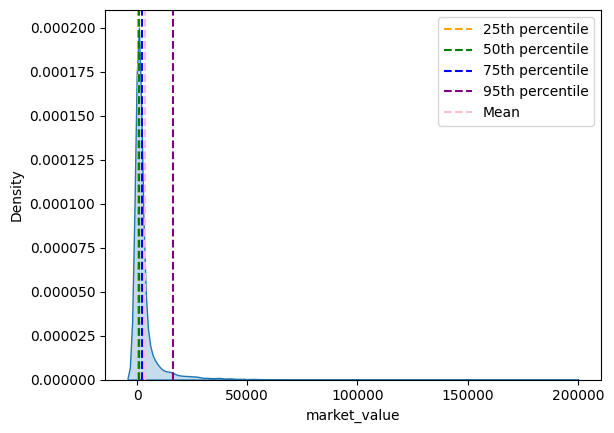

In [14]:
mean_market_value = np.mean(players_market_value)
median_market_value = np.median(players_market_value)
std_market_value = np.std(players_market_value)
max_market_value = np.max(players_market_value)
min_market_value = np.min(players_market_value)
percentile25th_market_value = np.percentile(players_market_value, 25)
percentile50th_market_value = np.percentile(players_market_value, 50)
percentile75th_market_value = np.percentile(players_market_value, 75)
percentile95th_market_value = np.percentile(players_market_value, 95)

print('Mean Market Value: ', mean_market_value)
print('Median Market Value: ', median_market_value)
print('Standard Deviation Market Value: ', std_market_value)
print('Max Market Value: ', max_market_value)
print('Min Market Value: ', min_market_value)
print('25th Percentile Market Value: ', percentile25th_market_value)
print('50th Percentile Market Value: ', percentile50th_market_value)
print('75th Percentile Market Value: ', percentile75th_market_value)
print('95th Percentile Market Value: ', percentile95th_market_value)

# density of market value
sns.kdeplot(players_market_value, fill=True) 
plt.axvline(percentile25th_market_value, color='orange', linestyle='--', label='25th percentile')
plt.axvline(percentile50th_market_value, color='green', linestyle='--', label='50th percentile')
plt.axvline(percentile75th_market_value, color='blue', linestyle='--', label='75th percentile')
plt.axvline(percentile95th_market_value, color='purple', linestyle='--', label='95th percentile')
plt.axvline(mean_market_value, color='pink', linestyle='--', label='Mean')
plt.legend()

plt.show()

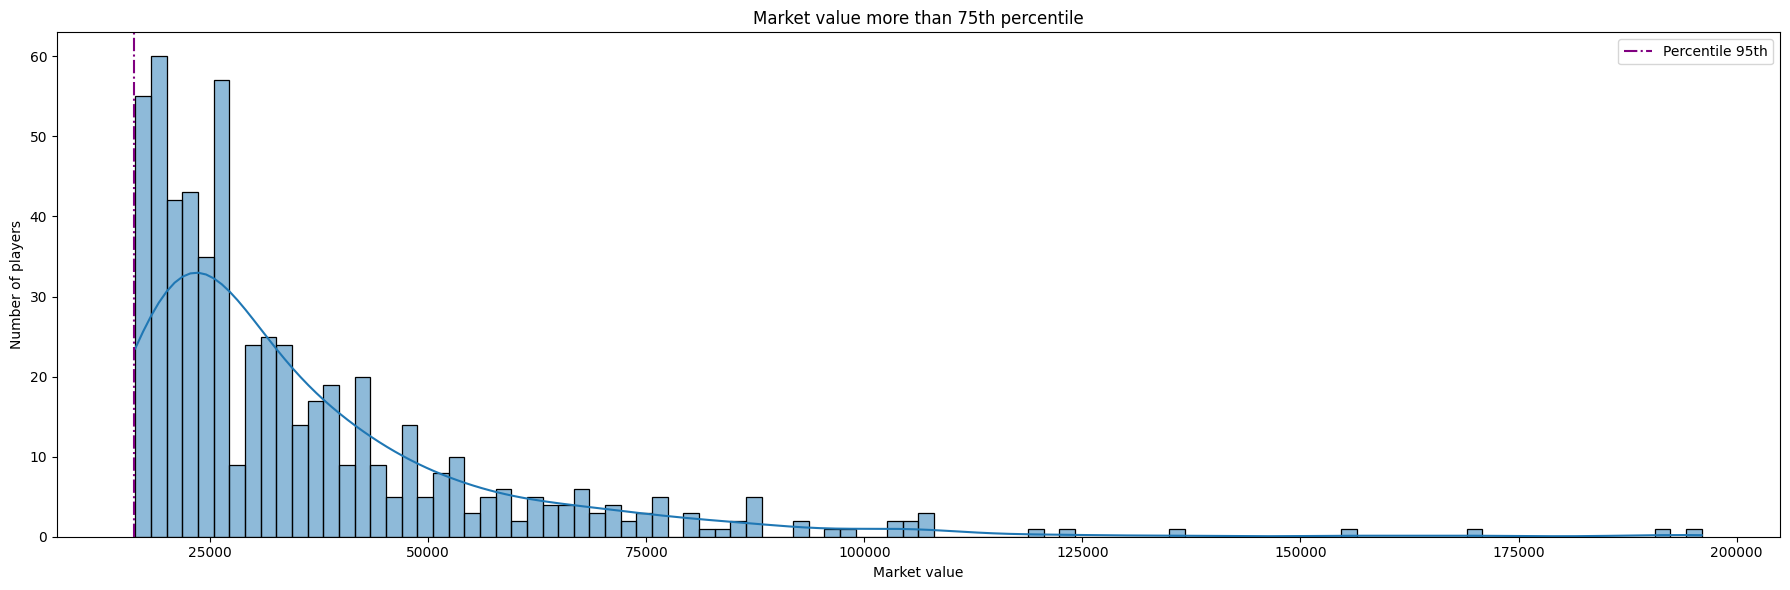

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(18, 6))

# sns.histplot(players[players['market_value'] < mean_market_value]['market_value'], bins=100, kde=True,ax=axs[0])
# axs[0].set_title('Market value less than mean')
# axs[0].set_xlabel('Market value')
# axs[0].set_ylabel('Number of players')
# axs[0].axvline(mean_market_value, color='pink', linestyle='--', linewidth=2,label='Mean')
# axs[0].axvline(percentile25th_market_value, color='orange', linestyle='-.',label='Percentile 25th')
# axs[0].axvline(median_market_value, color='green', linestyle='-',label='Percentile 50th') 
# axs[0].axvline(percentile75th_market_value, color='blue', linestyle='--', linewidth=2,label='Percentile 75th')
# axs[0].legend() 

# sns.histplot(players[players['market_value'].between(median_market_value, percentile95th_market_value)]['market_value'], bins=100, kde=True,ax=axs[1])
# axs[1].set_title('Market value between median and 95th percentile')
# axs[1].set_xlabel('Market value')
# axs[1].set_ylabel('Number of players')
# axs[1].axvline(median_market_value, color='green', linestyle='-',label='median')
# axs[1].axvline(percentile75th_market_value, color='blue', linestyle='--', linewidth=2,label='Percentile 75th')
# axs[1].axvline(np.percentile(players['market_value'], 95), color='purple', linestyle='-.',label='Percentile 95th')
# axs[1].legend()

sns.histplot(players[players['market_value'] > percentile95th_market_value]['market_value'], bins=100, kde=True,ax=axs)
axs.set_title('Market value more than 75th percentile')
axs.set_xlabel('Market value')
axs.set_ylabel('Number of players')
# axs.axvline(percentile75th_market_value, color='blue', linestyle='--', linewidth=2,label='Percentile 75th')
axs.axvline(percentile95th_market_value, color='purple', linestyle='-.',label='Percentile 95th')
axs.legend()

plt.tight_layout()

```Nhận xét```
- Phân phối của giá trị thị trường của các cầu thủ không đồng đều. Có một số cầu thủ có giá trị thị trường cao, trong khi phần lớn cầu thủ có giá trị thị trường thấp.